<a href="https://colab.research.google.com/github/IshitaLohia/Spam-Detection/blob/main/Spam_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()



Saving SMSSpamCollection to SMSSpamCollection


In [ ]:
import pandas as pd

# Replace 'filename.txt' with your actual uploaded file name
df = pd.read_csv('SMSSpamCollection', delimiter='\t', header=None)  # Or delimiter=',' if it's a CSV
df.head()


,0,1
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.rename(columns={0: 'Spam_Indicator', 1: 'Message'}, inplace=True)  # if your file had no headers


In [ ]:
df.head()

,Spam_Indicator,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df['Spam_Indicator'].value_counts(normalize=True)

,proportion
Spam_Indicator,
ham,0.865937
spam,0.134063


In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import re

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

from imblearn.over_sampling import SMOTE

!pip install wordcloud




In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud


In [ ]:
spam_text = " ".join(df[df['label'] == 1]['cleaned'])
ham_text = " ".join(df[df['label'] == 0]['cleaned'])
# Spam word cloud
spam_wc = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(spam_text)

# Ham word cloud
ham_wc = WordCloud(width=800, height=400, background_color='white', colormap='Blues').generate(ham_text)


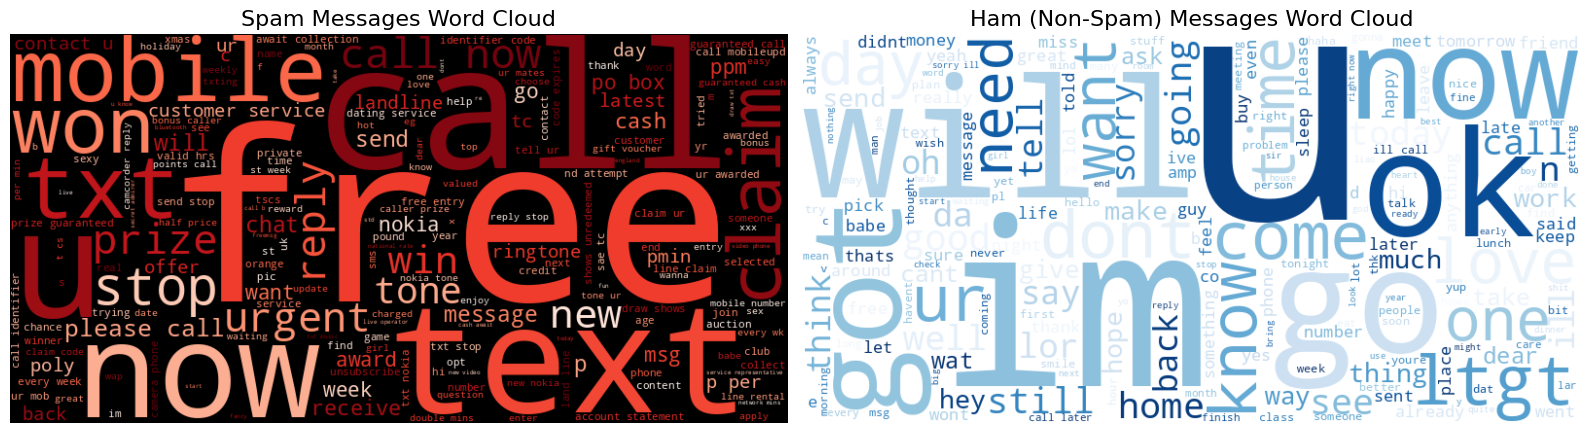

In [ ]:
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.imshow(spam_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Spam Messages Word Cloud', fontsize=16)

plt.subplot(1, 2, 2)
plt.imshow(ham_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Ham (Non-Spam) Messages Word Cloud', fontsize=16)

plt.tight_layout()
plt.show()


In [ ]:
# Load data
df = pd.read_csv('SMSSpamCollection', sep='\t', header=None, names=['label', 'message'])

In [ ]:
# Explore and Clean Data
print(df['label'].value_counts(normalize=True))
print(df.head())


label
ham     0.865937
spam    0.134063
Name: proportion, dtype: float64
  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [ ]:
# Convert labels to binary
df['label'] = df['label'].map({'ham': 0, 'spam': 1})


In [ ]:
# Text Preprocessing
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove punctuation/numbers
    text = text.strip()
    return text

df['cleaned'] = df['message'].apply(clean_text)


In [ ]:
# Vectorization

tfidf = TfidfVectorizer(stop_words='english', max_df=0.95)
X = tfidf.fit_transform(df['cleaned'])
y = df['label']


In [ ]:
# First split into train+val and test
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Then split temp into train and validation
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, stratify=y_temp, random_state=42)
# Now you have: 60% train, 20% val, 20% test



In [ ]:
# Class imbalance

smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)



In [ ]:
# Train the Model
model = LogisticRegression()
model.fit(X_train_balanced, y_train_balanced)


LogisticRegression()

In [ ]:
# Evaluate the model

def evaluate_model(split_name, X_set, y_true):
    y_pred = model.predict(X_set)
    acc = accuracy_score(y_true, y_pred)
    print(f"\n📊 Evaluation on {split_name} Set:")
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_true, y_pred))

# Evaluate
evaluate_model("Training", X_train, y_train)
evaluate_model("Validation", X_val, y_val)
evaluate_model("Test", X_test, y_test)



📊 Evaluation on Training Set:
Accuracy: 0.9880
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2894
           1       0.95      0.96      0.96       448

    accuracy                           0.99      3342
   macro avg       0.97      0.98      0.97      3342
weighted avg       0.99      0.99      0.99      3342


📊 Evaluation on Validation Set:
Accuracy: 0.9901
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       965
           1       0.99      0.94      0.96       150

    accuracy                           0.99      1115
   macro avg       0.99      0.97      0.98      1115
weighted avg       0.99      0.99      0.99      1115


📊 Evaluation on Test Set:
Accuracy: 0.9776
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       966
           1       0.95      0.88      0.91       149

    accuracy                           0

In [ ]:
s a capstone


Lower recall for minortiy class in Spam class



In [ ]:
# Trying class weight and imabalnce

model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train_bal, y_train_bal)


LogisticRegression(class_weight='balanced', max_iter=1000)

In [ ]:
# Evaluate the model

def evaluate_model(split_name, X_set, y_true):
    y_pred = model.predict(X_set)
    acc = accuracy_score(y_true, y_pred)
    print(f"\n📊 Evaluation on {split_name} Set:")
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_true, y_pred))

# Evaluate
evaluate_model("Training", X_train, y_train)
evaluate_model("Validation", X_val, y_val)
evaluate_model("Test", X_test, y_test)


📊 Evaluation on Training Set:
Accuracy: 0.9901
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2894
           1       0.96      0.96      0.96       448

    accuracy                           0.99      3342
   macro avg       0.98      0.98      0.98      3342
weighted avg       0.99      0.99      0.99      3342


📊 Evaluation on Validation Set:
Accuracy: 0.9758
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.98      0.84      0.90       150

    accuracy                           0.98      1115
   macro avg       0.98      0.92      0.94      1115
weighted avg       0.98      0.98      0.98      1115


📊 Evaluation on Test Set:
Accuracy: 0.9740
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       966
           1       0.95      0.85      0.90       149

    accuracy                           0

In [ ]:
tfidf = TfidfVectorizer(stop_words='english', ngram_range=(1, 2))

X = tfidf.fit_transform(df['cleaned'])
y = df['label']


In [ ]:
# Train the Model
model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train_bal, y_train_bal)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [ ]:
# Evaluate the model

def evaluate_model(split_name, X_set, y_true):
    y_pred = model.predict(X_set)
    acc = accuracy_score(y_true, y_pred)
    print(f"\n📊 Evaluation on {split_name} Set:")
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_true, y_pred))

# Evaluate
evaluate_model("Training", X_train, y_train)
evaluate_model("Validation", X_val, y_val)
evaluate_model("Test", X_test, y_test)


📊 Evaluation on Training Set:
Accuracy: 0.9901
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2894
           1       0.96      0.96      0.96       448

    accuracy                           0.99      3342
   macro avg       0.98      0.98      0.98      3342
weighted avg       0.99      0.99      0.99      3342


📊 Evaluation on Validation Set:
Accuracy: 0.9758
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.98      0.84      0.90       150

    accuracy                           0.98      1115
   macro avg       0.98      0.92      0.94      1115
weighted avg       0.98      0.98      0.98      1115


📊 Evaluation on Test Set:
Accuracy: 0.9740
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       966
           1       0.95      0.85      0.90       149

    accuracy                           0

In [ ]:
# Tree based model

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf.fit(X_train_bal, y_train_bal)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def evaluate(model, X, y, name="Set"):
    y_pred = model.predict(X)
    acc = accuracy_score(y, y_pred)
    print(f"\n📊 {name} Evaluation")
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y, y_pred))

# Evaluate on all sets
evaluate(rf, X_train_bal, y_train_bal, "Training")
evaluate(rf, X_val, y_val, "Validation")
evaluate(rf, X_test, y_test, "Test")



📊 Training Evaluation
Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2894
           1       1.00      1.00      1.00      2894

    accuracy                           1.00      5788
   macro avg       1.00      1.00      1.00      5788
weighted avg       1.00      1.00      1.00      5788

Confusion Matrix:
 [[2894    0]
 [   0 2894]]

📊 Validation Evaluation
Accuracy: 0.9704
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       965
           1       0.98      0.79      0.88       150

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.93      1115
weighted avg       0.97      0.97      0.97      1115

Confusion Matrix:
 [[963   2]
 [ 31 119]]

📊 Test Evaluation
Accuracy: 0.9695
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       966
           1       0.99      0.

In [ ]:
feature_names = tfidf.get_feature_names_out()
importances = rf.feature_importances_

n = min(len(importances), len(feature_names))  # Avoid index errors
top_n = 20
top_indices = np.argsort(importances)[-top_n:][::-1]

for i in top_indices:
    print(f"{feature_names[i]}: {importances[i]:.4f}")


din stripes: 0.0305
doing test: 0.0302
christmas thing: 0.0298
cnn ibn: 0.0244
blame day: 0.0238
dateboxessexcmxn: 0.0225
cupboard come: 0.0210
desk ill: 0.0209
art: 0.0189
dun sad: 0.0165
chikkuali: 0.0161
dsnt lik: 0.0148
dont mistake: 0.0146
assistance customer: 0.0134
cos thats: 0.0128
dont mindi: 0.0120
apply wwworangecoukow: 0.0111
amp life: 0.0105
collapsed: 0.0103
boy online: 0.0090


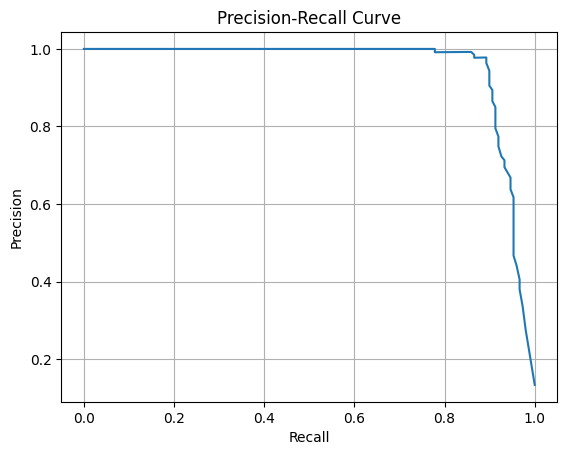

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

y_probs = rf.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()


In [ ]:

from sklearn.linear_model import LogisticRegressionCV

logreg = LogisticRegressionCV(
    cv=5,
    scoring='recall',             # 🔥 This optimizes for recall
    class_weight='balanced',
    penalty='l1',
    solver='liblinear',
    max_iter=1000,
    random_state=42
)

logreg.fit(X_train_bal, y_train_bal)



LogisticRegressionCV(class_weight='balanced', cv=5, max_iter=1000, penalty='l1',
                     random_state=42, scoring='recall', solver='liblinear')

In [ ]:
# Evaluate the model

from sklearn.metrics import classification_report, recall_score

def evaluate(model, X, y, name="Set"):
    y_pred = model.predict(X)
    rec = recall_score(y, y_pred)
    print(f"\n📊 {name} Set - Recall: {rec:.4f}")
    print(classification_report(y, y_pred))

evaluate(logreg, X_train, y_train, "Training")
evaluate(logreg, X_val, y_val, "Validation")
evaluate(logreg, X_test, y_test, "Test")



📊 Training Set - Recall: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2894
           1       1.00      1.00      1.00       448

    accuracy                           1.00      3342
   macro avg       1.00      1.00      1.00      3342
weighted avg       1.00      1.00      1.00      3342


📊 Validation Set - Recall: 0.8267
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       965
           1       0.94      0.83      0.88       150

    accuracy                           0.97      1115
   macro avg       0.96      0.91      0.93      1115
weighted avg       0.97      0.97      0.97      1115


📊 Test Set - Recall: 0.8523
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       966
           1       0.94      0.85      0.89       149

    accuracy                           0.97      1115
   macro avg       0.96      0.

In [ ]:
from sklearn.metrics import precision_recall_curve

# Predict probabilities
y_probs = logreg.predict_proba(X_test)[:, 1]

# Adjust threshold
threshold = 0.3
y_pred_custom = (y_probs >= threshold).astype(int)

# Evaluate again
print(f"\n📊 Custom Threshold (>{threshold}) Evaluation")
print(classification_report(y_test, y_pred_custom))



📊 Custom Threshold (>0.3) Evaluation
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       966
           1       0.93      0.86      0.89       149

    accuracy                           0.97      1115
   macro avg       0.95      0.92      0.94      1115
weighted avg       0.97      0.97      0.97      1115



In [ ]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(scale_pos_weight=pos_weight, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_bal, y_train_bal)


NameError: name 'pos_weight' is not defined

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

nb = MultinomialNB()
nb.fit(X_train, y_train)  # Use original imbalanced data

def evaluate(model, X, y, name="Set"):
    y_pred = model.predict(X)
    acc = accuracy_score(y, y_pred)
    print(f"\n📊 {name} Evaluation")
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y, y_pred))

evaluate(nb, X_train, y_train, "NB - Train")
evaluate(nb, X_val, y_val, "NB - Validation")
evaluate(nb, X_test, y_test, "NB - Test")




📊 NB - Train Evaluation
Accuracy: 0.9728
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2894
           1       1.00      0.80      0.89       448

    accuracy                           0.97      3342
   macro avg       0.98      0.90      0.94      3342
weighted avg       0.97      0.97      0.97      3342


📊 NB - Validation Evaluation
Accuracy: 0.9543
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       965
           1       1.00      0.66      0.80       150

    accuracy                           0.95      1115
   macro avg       0.97      0.83      0.88      1115
weighted avg       0.96      0.95      0.95      1115


📊 NB - Test Evaluation
Accuracy: 0.9614
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       966
           1       1.00      0.71      0.83       149

    accuracy                           0.96      111

In [ ]:
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score

# Calculate scale_pos_weight (useful for imbalance)
spam_ratio = sum(y_train == 0) / sum(y_train == 1)

xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    scale_pos_weight=spam_ratio,  # Tells XGBoost to care more about the minority class
    max_depth=4,
    learning_rate=0.1,
    n_estimators=100,
    random_state=42
)

xgb_model.fit(X_train, y_train)

evaluate(xgb_model, X_train, y_train, "XGBoost - Train")
evaluate(xgb_model, X_val, y_val, "XGBoost - Validation")
evaluate(xgb_model, X_test, y_test, "XGBoost - Test")


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:00:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



📊 XGBoost - Train Evaluation
Accuracy: 0.9794
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2894
           1       0.92      0.93      0.92       448

    accuracy                           0.98      3342
   macro avg       0.95      0.96      0.96      3342
weighted avg       0.98      0.98      0.98      3342


📊 XGBoost - Validation Evaluation
Accuracy: 0.9543
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       965
           1       0.84      0.81      0.83       150

    accuracy                           0.95      1115
   macro avg       0.91      0.89      0.90      1115
weighted avg       0.95      0.95      0.95      1115


📊 XGBoost - Test Evaluation
Accuracy: 0.9525
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       966
           1       0.82      0.83      0.82       149

    accuracy                         